In [1]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import time
import matplotlib
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
import pandas as pd
from IPython.display import clear_output
import warnings
import matplotlib.animation as animation
warnings.filterwarnings('ignore')

In [2]:
cp=input("press 0 for call and 1 for put ")
strike=input("enter strike price ")
a_array=[]
b_array=[]
c_array=[]
x = []

title_ = str(strike)

if(cp==1):
        title_ = title_ + ' Put'
else:
        title_ = title_ + ' Call'


press 0 for put and 1 for call 0
enter strike price 10000


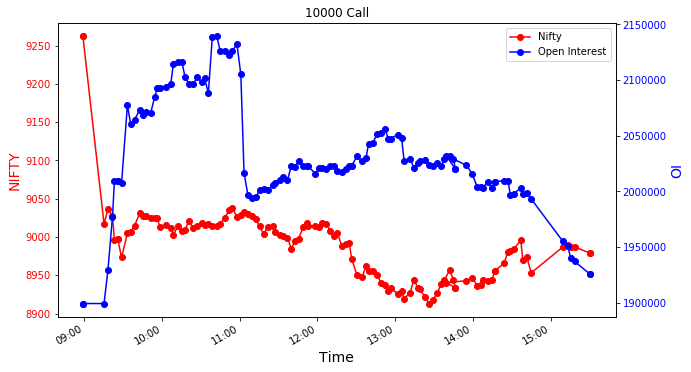

KeyboardInterrupt: 

In [7]:
url='https://www1.nseindia.com/live_market/dynaContent/live_watch/option_chain/optionDates.jsp?symbol=NIFTY&instrument=OPTIDX&strike='+str(strike)+'.00'
headers = {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.92 Safari/537.36'}



while(True):
    response = requests.get(url,headers=headers)
    soup = BeautifulSoup(response.text,'html.parser')

    
    a=soup.find(id="wrapper_btm").findAll('tr')[0].findAll('td')[1].findAll('span')[0].findAll('b')[0].getText()
    a=float(a[6:])
    a_array.append(a)

    if cp==0:
        b=soup.find(id="octable").findAll('tr')[3].findAll('td')[21].getText()
        b=float(b.replace(',',''))
        b_array.append(b)
    else:
        b=soup.find(id="octable").findAll('tr')[3].findAll('td')[1].getText()
        b=float(b.replace(',',''))
        b_array.append(b)
    
    c=soup.find(id="wrapper_btm").findAll('tr')[0].findAll('td')[1].findAll('span')[1].getText()
    c=c[19:27]
    c=datetime.strptime(c,'%H:%M:%S')
    
    c_array.append(c)
    
    
    #print(" ")
    #print("NIFTY ", a_array)
    #print("OI    ",b_array)
    #print(c_array)
    
    clear_output(wait=True)
    
    fig,ax = plt.subplots(figsize=(10, 6))
    lns1 = ax.plot(c_array, a_array, color="red", marker="o", label='Nifty')
    ax.set_xlabel("Time",fontsize=14)
    
    ax.set_ylabel("NIFTY",fontsize=14, color='red')
    ax.tick_params(axis='y', labelcolor='red')
    ax2=ax.twinx()
    
    
    lns2 = ax2.plot(c_array, b_array,color="blue",marker="o", label='Open Interest')
    ax2.set_ylabel("OI",fontsize=14, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter('%H:%M')
    plt.gca().xaxis.set_major_formatter(myFmt)
    
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0)
    plt.title('10000 Call')
    plt.show()
    
    #break
    
    time.sleep(180)
    
    


In [69]:
li = [a_array, b_array, c_array]

In [70]:
df = pd.DataFrame(li)
df = df.transpose()
df.columns = ["NIFTY", "OI", "TIME"]
df.to_excel('output.xls')

In [71]:
df

,NIFTY,OI,TIME
0,8992.8,158025,1900-01-01 15:30:30
